In [279]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

1.995995995995996 0.8642916191922776


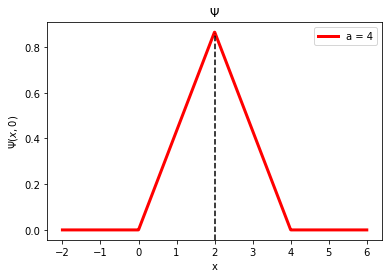

In [280]:
a=4
h_cortado = 1
m = 1

def psi_in(x,a):
    A = np.sqrt(12/a**3)
    if (0 <= x <= (a/2)):
        return A*x
    elif ((a/2) <= x <= a):
        return A*(a-x)
    else:
        return False

psi_list=[]
x_range = np.linspace(-2,6,1000)
for i in x_range:
    psi_list.append(psi_in(i,a))

for i in range(len(psi_list)):
    if psi_list[i] == max(psi_list):
        print(x_range[i],psi_list[i])
        
plt.plot(x_range,psi_list,label='a = 4', color='r', linewidth=3)
plt.ylabel('$\Psi(x,0)$')
plt.xlabel('x')
plt.title('$\Psi$ ')
plt.axvline(x=2, ymin=0, ymax=0.95, ls = '--', c = 'k')
plt.legend()


In [281]:
def Cn(a,n,x):
    return np.sqrt(2/a)* np.sin(n*np.pi*x/a)*psi_in(x,a)

Cn_list = np.zeros(100)

for i in range(1,100):
    Cn_list[i],err = integrate.quad(lambda x :Cn(a,i,x),0,a)
    

$En = \frac {n^{2}\cdot \pi^{2} \cdot \hbar^{2}}{2 \cdot m \cdot a^2}$

In [282]:
def Psi(a,n,x,t):
    sumR=0
    sumI=0
    for i in range(0,n): #n
        eind = ((i**2)*(np.pi**2)*h_cortado**2)/(2*m*(a**2))*t/h_cortado
        sumR = sumR + Cn_list[i]*np.sqrt(2/a)*np.sin((np.pi*i*x)/a)*np.cos(eind)
        sumI = sumI + Cn_list[i]*np.sqrt(2/a)*np.sin((np.pi*i*x)/a)*np.sin(-eind)
    return sumR, sumI

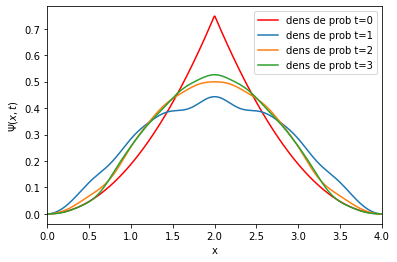

In [283]:
n = 20
t = 1
psiREAL5=[]
psiIMAG5=[]
for z in x_range:
    psiREAL3, psiIMAG3 = Psi(a,n,z,t)
    psiREAL5.append(psiREAL3)
    psiIMAG5.append(psiIMAG3)
    
t = 2
psiREAL10=[]
psiIMAG10=[]
for z in x_range:
    psiREAL4, psiIMAG4 = Psi(a,n,z,t)
    psiREAL10.append(psiREAL4)
    psiIMAG10.append(psiIMAG4)

t = 3 
psiREAL15=[]
psiIMAG15=[]
for z in x_range:
    psiREAL6, psiIMAG6 = Psi(a,n,z,t)
    psiREAL15.append(psiREAL6)
    psiIMAG15.append(psiIMAG6)

psiREAL52 = np.array(psiREAL5) 
psiIMAG52 = np.array(psiIMAG5)
psi_list2 = np.array(psi_list)

psiREAL102 = np.array(psiREAL10) 
psiIMAG102 = np.array(psiIMAG10)

psiREAL152 = np.array(psiREAL15) 
psiIMAG152 = np.array(psiIMAG15)


plt.plot(x_range,psi_list2**2,color='r',label='dens de prob t=0')

plt.plot(x_range,psiREAL52**2+psiIMAG52**2, label = 'dens de prob t=1')

plt.plot(x_range,psiREAL102**2+psiIMAG102**2, label = 'dens de prob t=2')

plt.plot(x_range,psiREAL152**2+psiIMAG152**2, label = 'dens de prob t=3')

plt.ylabel('$\Psi(x,t)$')
plt.xlabel('x')

plt.xlim(0,a)
plt.legend()

$ \sum |C_n|^2 = 1$

In [284]:
c2=[]
for i in Cn_list:
    c2.append(abs(i)**2)
    
sum=0
for i in c2:
    sum = sum + i
print(sum)

0.999999835777123


$ \left \langle H \right \rangle = \int{\Psi(x,0) \cdot \hat{H} \cdot \Psi^*(x,0) dx}$


$ \left \langle H \right \rangle = \int ( \sum\limits_{n} C_n^*  \phi_n^*(x)) \cdot \hat{H} \cdot ( \sum\limits_{m} C_m  \phi_m(x))dx $

$ \left \langle H \right \rangle = \sum\limits_{n,m}C_n^* \cdot C_m \int \phi_n^*(x) \cdot \hat{H} \cdot \phi_m(x)dx $

$\hat{H}\cdot \phi(x) = E \cdot \phi(x)$

$ \left \langle H \right \rangle = \sum\limits_{n,m}C_n^* \cdot C_m \int \phi_n^*(x) \cdot  E_m \cdot \phi_m(x)$ 


$ \left \langle H \right \rangle = \sum\limits_{n,m}C_n^* \cdot C_m \cdot  E_m \int \phi_n^*(x)   \cdot \phi_m(x)$ 

$ \left \langle H \right \rangle = \sum\limits_{n,m}C_n^* \cdot C_m \cdot  E_m \cdot \delta_{m,n}$ 

$ \left \langle H \right \rangle = \sum\limits_{n}C_n^* \cdot C_n \cdot  E_n $ 

$ \left \langle H \right \rangle = \sum\limits_{n} |C_n|^2 \cdot  E_n $  -> Probabilidade de uma medição de energia resultar em $E_n$, sendo $C_n$ o peso da média ponderada.








$P_1 = |C_1|^2$

In [285]:
#C
print("Probabilidade de E1 = ", c2[1])

Probabilidade de E1 =  0.9855342964496961


$ \left \langle H \right \rangle =   \sum|Cn|^{2} E_{n}$

In [286]:
#D
E_list= np.zeros(100)
for i in range(1,100):
    E_list[i] = ((i**2)*(np.pi**2)*(h_cortado**2))/(2*m*(a**2))


soma=0
for i in range(1,100):
      soma = soma + c2[i]*E_list[i]
print('valor esperado da energia', soma )

valor esperado da energia 0.37348023289886484
